In [5]:
!wget -P ./data https://nlp100.github.io/data/neko.txt　

--2023-04-21 09:15:24--  https://nlp100.github.io/data/neko.txt
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
nlp100.github.io (nlp100.github.io)|185.199.110.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 975789 (953K) [text/plain]
`./data/neko.txt' に保存中

neko.txt            100%[===================>] 952.92K  --.-KB/s 時間 0.06s      

2023-04-21 09:15:24 (16.1 MB/s) - `./data/neko.txt' へ保存完了 [975789/975789]



In [8]:
!head data/neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。


In [10]:
!tail data/neko.txt

どこにどうしていても差支えはない。
ただ楽である。
否楽そのものすらも感じ得ない。
日月を切り落し、天地を粉韲して不可思議の太平に入る。
吾輩は死ぬ。
死んでこの太平を得る。
太平は死ななければ得られぬ。
南無阿弥陀仏南無阿弥陀仏。
ありがたいありがたい。



In [9]:
!wc data/neko.txt

    9964   18861  975789 data/neko.txt


In [5]:
#MeCabと辞書は既に入れた記憶がある
import MeCab
#モジュールの中身を見る
#help(MeCab)

In [6]:
text = '太郎は昨日シンポジウムに参加して知見を得た'
#タグ付クラスの呼び出し
mecab = MeCab.Tagger()
#parseメソッドの呼び出し→形態素解析
parses = mecab.parse(text)
t = parses.split('\n')
print(t)
import re
for i in t:
    tt = re.split('[\t,]',i)
    print(tt)

['太郎\t名詞,固有名詞,人名,名,*,*,太郎,タロウ,タロー', 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ', '昨日\t名詞,副詞可能,*,*,*,*,昨日,キノウ,キノー', 'シンポジウム\t名詞,一般,*,*,*,*,シンポジウム,シンポジウム,シンポジューム', 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ', '参加\t名詞,サ変接続,*,*,*,*,参加,サンカ,サンカ', 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ', 'て\t助詞,接続助詞,*,*,*,*,て,テ,テ', '知見\t名詞,一般,*,*,*,*,知見,チケン,チケン', 'を\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '得\t動詞,自立,*,*,一段,連用形,得る,エ,エ', 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', 'EOS', '']
['太郎', '名詞', '固有名詞', '人名', '名', '*', '*', '太郎', 'タロウ', 'タロー']
['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ']
['昨日', '名詞', '副詞可能', '*', '*', '*', '*', '昨日', 'キノウ', 'キノー']
['シンポジウム', '名詞', '一般', '*', '*', '*', '*', 'シンポジウム', 'シンポジウム', 'シンポジューム']
['に', '助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ']
['参加', '名詞', 'サ変接続', '*', '*', '*', '*', '参加', 'サンカ', 'サンカ']
['し', '動詞', '自立', '*', '*', 'サ変・スル', '連用形', 'する', 'シ', 'シ']
['て', '助詞', '接続助詞', '*', '*', '*', '*', 'て', 'テ', 'テ']
['知見', '名詞', '一般', '*', '*', '*', '*', '知見', 'チケン', 'チケン']
['を', '助詞', '格助詞', '一般', '*', '*', '*', 'を', 'ヲ', 'ヲ']
['得',

MeCabの出力
表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

In [7]:
with open('data/neko.txt') as fi, open('work/neko.txt.mecab', 'w') as fo:
    mecab = MeCab.Tagger()
    for sentence in fi:
        parsed_line = mecab.parse(sentence)
        fo.write(parsed_line)

#30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．
ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [8]:
import MeCab
import re

sentence_list = []
neko_txt_list = []


with open('work/neko.txt.mecab') as fi:
    for analyzed_line in fi:
        morpheme_line = re.split('[\t,]',analyzed_line.rstrip())
        morph_dict = {}
        if morpheme_line[0] == 'EOS':
            if sentence_list:
                neko_txt_list.append(sentence_list)
                sentence_list = []
            else:
                sentence_list = []
        else:
            morph_dict['surface'] = morpheme_line[0]
            morph_dict['base'] = morpheme_line[7]
            morph_dict['pos'] = morpheme_line[1]
            morph_dict['pos1'] = morpheme_line[2]
            sentence_list.append(morph_dict)


In [9]:
neko_txt_list[0:5]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'

#31. 動詞

動詞の表層形をすべて抽出せよ．

In [10]:
#ダブりなし
def morph_get_from_neko(part_of_speech, shape, save_list):
    save_list = []
    for sentence in neko_txt_list:
        for morph in sentence:
            if morph['pos'] == part_of_speech:
                if morph[shape] in save_list:
                    continue
                else:
                    save_list.append(morph[shape])
    return save_list

In [11]:
surface_verbs_list = []
morph_get_from_neko('動詞','surface',surface_verbs_list)[:5]

['生れ', 'つか', 'し', '泣い', 'いる']

In [12]:
len(morph_get_from_neko('動詞','surface',surface_verbs_list))

3893

#32. 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [13]:
base_verbs_list = []
morph_get_from_neko('動詞','base',base_verbs_list)[:5]

['生れる', 'つく', 'する', '泣く', 'いる']

In [14]:
len(morph_get_from_neko('動詞','base',surface_verbs_list))

2300

#33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [15]:
all_a_of_b = []
a_of_b = []

for sentence in neko_txt_list:
    a_of_b = []
    for morph in sentence:
        if morph['pos'] == '名詞':
            if len(a_of_b) == 0:
                a_of_b.append(morph['surface'])
            elif len(a_of_b) == 2:
                a_of_b.append(morph['surface'])
                all_a_of_b.append(''.join(a_of_b))
                a_of_b = []
                a_of_b.append(morph['surface'])
        elif morph['surface'] == 'の' and morph['pos'] == '助詞' and len(a_of_b) == 1:
            a_of_b.append(morph['surface'])
        else:
            a_of_b = []

In [16]:
len(all_a_of_b)

6044

#34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [17]:
all_nouns = []
nouns = []

for sentence in neko_txt_list:
    for morph in sentence:
        if morph['pos'] == '名詞':
            nouns.append(morph['surface'])
        else:
            if len(nouns) >= 2:
                all_nouns.append(''.join(nouns))
                nouns = []
            else:
                nouns = []
        
        

In [18]:
print(all_nouns[0:10])
print(len(all_nouns))

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外']
7338


#35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [23]:
from collections import Counter
import collections
cnt1 = Counter()
for sentence in neko_txt_list:
    for morph in sentence:
        cnt1[morph['surface']] += 1

In [57]:
cnt1.most_common(10)

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988)]

#36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [47]:
#グラフを描画するために、Matplotlibライブラリから「pyplot」を呼び出して利用
from matplotlib import pyplot as pyp

Text(0, 0.5, '出現頻度')

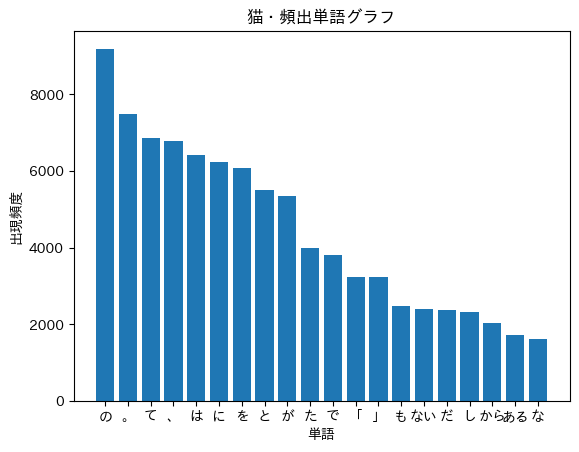

In [48]:
import japanize_matplotlib
l = cnt1.most_common(20)
word = []
frequency =[]
for tupple in l:
    word.append(tupple[0])
    frequency.append(tupple[1])
pyp.bar(word, frequency, tick_label=word)
pyp.title("猫・頻出単語グラフ")
pyp.xlabel("単語")
pyp.ylabel("出現頻度")

#37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [49]:
#形態素の基本形の一文を作るやつ
def make_useful_sentence(sample_list):
    all_sent = []
    sent = []
    for sentence in sample_list:
        for m_dict in sentence:
            sent.append(m_dict['base'])
        all_sent.append(sent)
        sent = []
    return all_sent

In [51]:
co_occurrence = Counter()
for useful_sentence in make_useful_sentence(neko_txt_list):
    if '猫' in useful_sentence:
        useful_sentence.remove('猫')
        for word in useful_sentence:
            co_occurrence[word] += 1

In [53]:
co_occurrence_list = co_occurrence.most_common(10)
co_occurrence_list

[('の', 391),
 ('は', 272),
 ('、', 252),
 ('に', 250),
 ('を', 232),
 ('だ', 231),
 ('て', 229),
 ('。', 209),
 ('と', 202),
 ('が', 180)]

In [55]:
def figure_maker(counter_list, title, x_name, y_name):
    x_list = []
    y_list = []
    for tupple in counter_list:
        x_list.append(tupple[0])
        y_list.append(tupple[1])
    pyp.bar(x_list, y_list, tick_label = x_list)
    pyp.title(title)
    pyp.xlabel(x_name)
    pyp.ylabel(y_name)

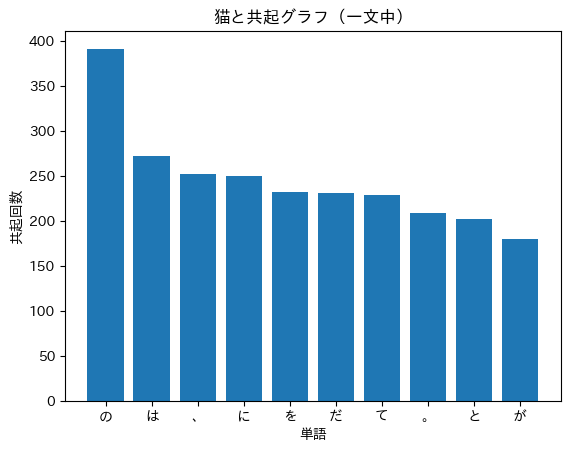

In [56]:
figure_maker(co_occurrence_list,"猫と共起グラフ（一文中）", "単語", "共起回数")

#38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [60]:
frequency_count = Counter()
for sentence in neko_txt_list:
    for morph in sentence:
        frequency_count[morph['base']] += 1

Text(0, 0.5, '種類数')

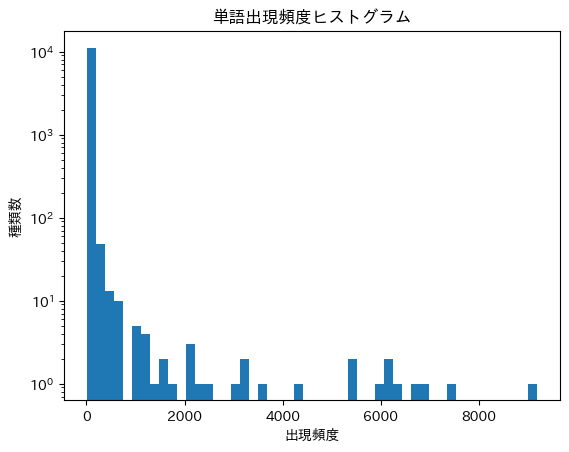

In [63]:
pyp.hist(frequency_count.values(),log=True, bins = 50)
pyp.title("単語出現頻度ヒストグラム")
pyp.xlabel("出現頻度")
pyp.ylabel("種類数")

#39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [79]:
rank_count = frequency_count.most_common()
#rank_count

In [76]:
word_rank_list = [num for num in range(1,len(rank_count)+1)]
frequency_list = [d[1] for d in rank_count]

Text(0, 0.5, '出現頻度')

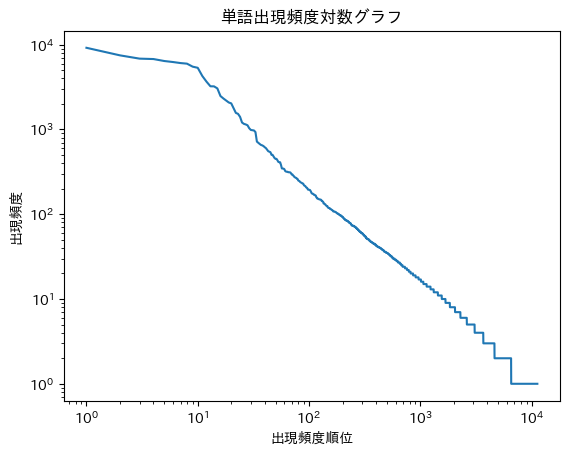

In [77]:
pyp.plot(word_rank_list, frequency_list)
pyp.xscale('log')
pyp.yscale('log')
pyp.title("単語出現頻度対数グラフ")
pyp.xlabel("出現頻度順位")
pyp.ylabel("出現頻度")